In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import LSTM, Dense

We will try to predict hourly prices.  We can get the data using the yfinance package.

<AxesSubplot:xlabel='Date'>

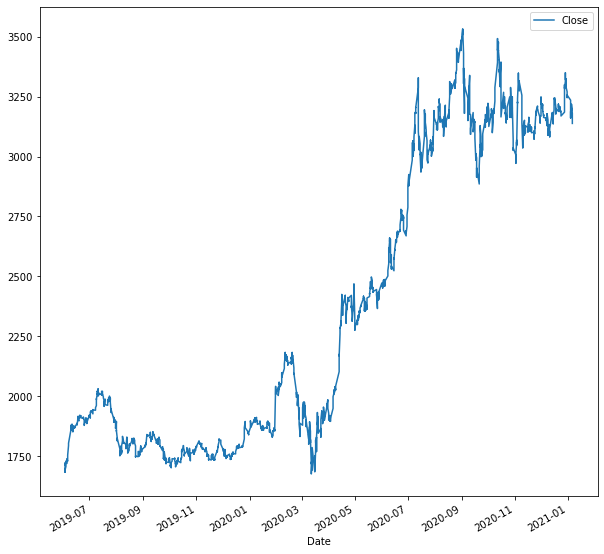

In [2]:
data=yf.download('AMZN',start='2019-06-01', interval='1h',  end='2021-01-07',progress=False)[['Close']]
data.head()
 
data.plot(figsize=(10,10))

The training data will have look back values noted as `lb`.  We set lb=10.  We also scale it using `MinMaxScaler`.  We will reserve 10% of the data as the test data.

In [3]:
cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*0.90)]
scl = MinMaxScaler()
#Scale the data
scl.fit(train.values.reshape(-1,1))
cl =scl.transform(cl.values.reshape(-1,1))
#Create a function to process the data into lb observations look back slices
# and create the train test dataset (90-10)
def processData(data,lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb),0])
        Y.append(data[(i+lb),0])
    return np.array(X),np.array(Y)
lb=10
X,y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*0.90)],X[int(X.shape[0]*0.90):]
y_train,y_test = y[:int(y.shape[0]*0.90)],y[int(y.shape[0]*0.90):]
print(X_train.shape[0],X_train.shape[1])
print(X_test.shape[0], X_test.shape[1])
print(y_train.shape[0])
print(y_test.shape[0])

2520 10
281 10
2520
281


Here will will build and train the LSTM model.

In [4]:
# Build the model
model = Sequential()
model.add(LSTM(256, input_shape=(lb, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Reshape data for (Sample,Timestep,Features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Fit model with history to check for overfitting
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test), shuffle=False)
model.summary()

Epoch 1/300
79/79 [==============================] - 3s 35ms/step - loss: 0.0040 - val_loss: 0.0017
Epoch 2/300
79/79 [==============================] - 2s 24ms/step - loss: 0.0017 - val_loss: 3.7916e-04
Epoch 3/300
79/79 [==============================] - 2s 24ms/step - loss: 0.0013 - val_loss: 2.8809e-04
Epoch 4/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0025 - val_loss: 0.0049
Epoch 7/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 8/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0018 - val_loss: 0.0019
Epoch 9/300
79/79 [==============================] - 2s 25ms/step - loss: 0.0016 - val_loss: 0.0013
Epoch 10/300
79/79 [==============================] - 2s 26ms/step - loss: 0.0012 - val_loss

Epoch 77/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6204e-04 - val_loss: 1.6481e-04
Epoch 78/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6099e-04 - val_loss: 1.5945e-04
Epoch 79/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6062e-04 - val_loss: 1.5674e-04
Epoch 80/300
79/79 [==============================] - 2s 23ms/step - loss: 1.6020e-04 - val_loss: 1.5231e-04
Epoch 81/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6028e-04 - val_loss: 1.5105e-04
Epoch 82/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6001e-04 - val_loss: 1.4710e-04
Epoch 83/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6062e-04 - val_loss: 1.4585e-04
Epoch 84/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6178e-04 - val_loss: 1.4099e-04
Epoch 85/300
79/79 [==============================] - 2s 22ms/step - loss: 1.6551e-04 - val_loss: 1.4433e-04
Epoch 86/300
79/79 

79/79 [==============================] - 2s 23ms/step - loss: 1.5320e-04 - val_loss: 1.1106e-04
Epoch 152/300
79/79 [==============================] - 2s 23ms/step - loss: 1.5050e-04 - val_loss: 1.0812e-04
Epoch 153/300
79/79 [==============================] - 2s 23ms/step - loss: 1.5175e-04 - val_loss: 1.1140e-04
Epoch 154/300
79/79 [==============================] - 2s 23ms/step - loss: 1.4573e-04 - val_loss: 1.0149e-04
Epoch 155/300
79/79 [==============================] - 2s 22ms/step - loss: 1.4469e-04 - val_loss: 9.8570e-05
Epoch 156/300
79/79 [==============================] - 2s 22ms/step - loss: 1.4173e-04 - val_loss: 9.4894e-05
Epoch 157/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3709e-04 - val_loss: 9.0472e-05
Epoch 158/300
79/79 [==============================] - 2s 23ms/step - loss: 1.3669e-04 - val_loss: 9.0982e-05
Epoch 159/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3709e-04 - val_loss: 9.1485e-05
Epoch 160/300
79/79 [===

Epoch 225/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3380e-04 - val_loss: 9.1185e-05
Epoch 226/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3446e-04 - val_loss: 9.2019e-05
Epoch 227/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3508e-04 - val_loss: 9.2274e-05
Epoch 228/300
79/79 [==============================] - 2s 23ms/step - loss: 1.3506e-04 - val_loss: 9.2544e-05
Epoch 229/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3616e-04 - val_loss: 9.3044e-05
Epoch 230/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3775e-04 - val_loss: 9.5738e-05
Epoch 231/300
79/79 [==============================] - 2s 23ms/step - loss: 1.3925e-04 - val_loss: 9.5230e-05
Epoch 232/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3643e-04 - val_loss: 9.5152e-05
Epoch 233/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3905e-04 - val_loss: 9.5725e-05
Epoch 234/

79/79 [==============================] - 2s 22ms/step - loss: 1.3490e-04 - val_loss: 9.9962e-05
Epoch 300/300
79/79 [==============================] - 2s 22ms/step - loss: 1.3683e-04 - val_loss: 1.0212e-04
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'Train Dataset')

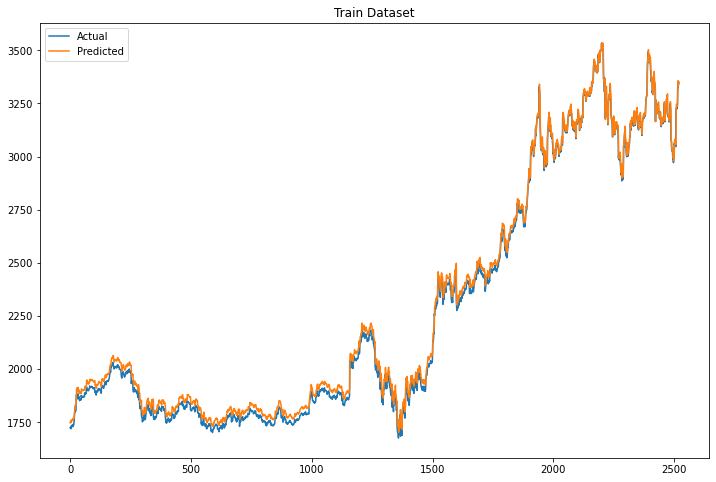

In [5]:
plt.figure(figsize=(12, 8))

Xt = model.predict(X_train)
plt.plot(scl.inverse_transform(y_train.reshape(-1, 1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Train Dataset")

Text(0.5, 1.0, 'Test Dataset')

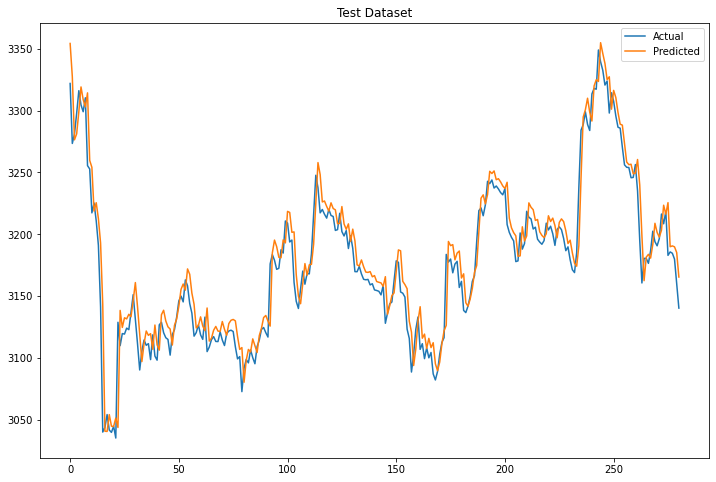

In [6]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

The model is not bad for predicting a single step ahead.  Let us try with N steps ahead.  First we try 251 steps.

In [7]:
def processData(data, lb):
    X = []
    for i in range(len(data) - lb - 1):
        X.append(data[i:(i + lb), 0])
    return np.array(X)

Text(0.5, 1.0, 'Test Dataset 250 Obs Ahead')

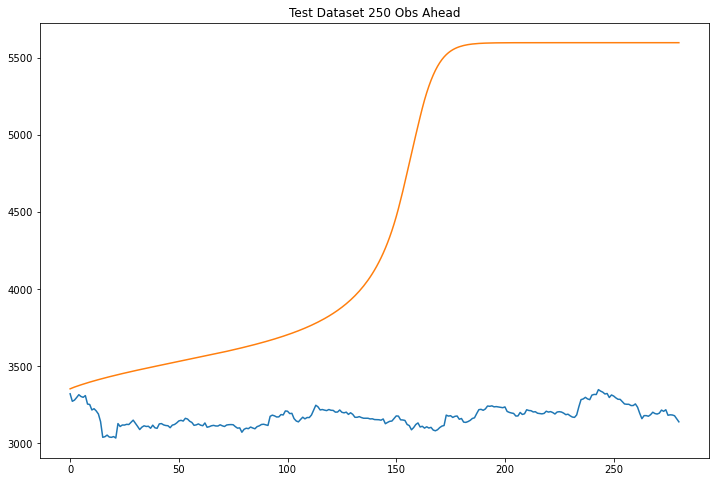

In [8]:
# create the x_test_dummy
cl2 = cl.copy()
pred = []
for i in range(X_test.shape[0]):
    cl2[int(X.shape[0] * 0.90) + i + lb] = model.predict(X_test)[i]
    pred.extend(model.predict(X_test)[i])
    X = processData(cl2, lb)
    X_train, X_test = X[:int(X.shape[0] * 0.90)], X[int(X.shape[0] * 0.90):]
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

prediction = scl.inverse_transform(np.array(pred).reshape(-1, 1))
plt.figure(figsize=(12, 8))
plt.plot(scl.inverse_transform(y_test.reshape(-1, 1)), label="Actual")
plt.plot(prediction, label="Predicted")

plt.title("Test Dataset 250 Obs Ahead")

This does not really work.